# let's practice what we have learned so far and visualize some data!

In order to validate this checkpoint you are asked to accomplish the following tasks:


# Preprocessing phase.
After importing the dataset using Pandas start by showing the head of the dataset then some general information about the data columns and values.

As a next step, apply what you have learned in the course to preprocess your data: find missing information and replace it with the appropriate values.

Verify that your data is ready to be treated.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("titanic-passengers.csv") 
data.shape
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
data.head(893)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


As a next step, apply what you have learned in the course to preprocess your data: find missing information and replace it with the appropriate values.


In [5]:
data = data.dropna(axis=0)

In [6]:
data.shape

(183, 12)

Verify that your data is ready to be treated.

In [7]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,3.000000,80.000000,3.000000,4.000000,512.329200


# 2. Visualization phase:

Let’s begin now with the data visualization phase: 

Start by studying the distribution of the most important features based on your understanding of the dataset and the problem.

In [8]:
data = data.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)

In [9]:
data.shape

(183, 5)

In [10]:
data.describe()

,PassengerId,Pclass,Age
count,183.000000,183.000000,183.000000
mean,455.366120,1.191257,35.674426
std,247.052476,0.515187,15.643866
min,2.000000,1.000000,0.920000
25%,263.500000,1.000000,24.000000
50%,457.000000,1.000000,36.000000
75%,676.000000,1.000000,47.500000
max,890.000000,3.000000,80.000000


Visualize the correlation between Sex and Age in a plot of your choosing. The visualized plot should give us obvious deductions concerning the importance of age and sex in the survival of the individuals.

<AxesSubplot:xlabel='Age', ylabel='Sex'>

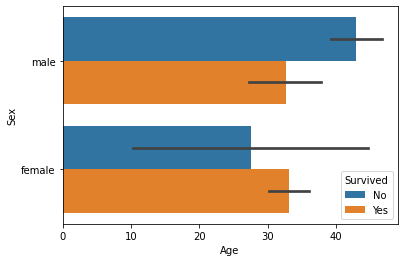

In [23]:
sns.barplot(data=data, x='Age', y='Sex', hue ='Survived') 

Pick two other features and study their impact on the survival of the individuals.


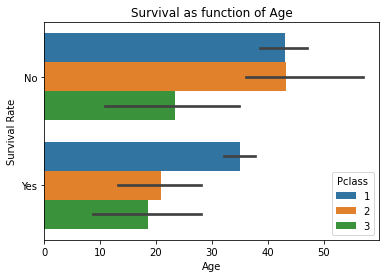

In [25]:
sns.barplot(x='Age', y='Survived', hue='Pclass', data=data)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Age")
plt.show()


<AxesSubplot:xlabel='Pclass', ylabel='PassengerId'>

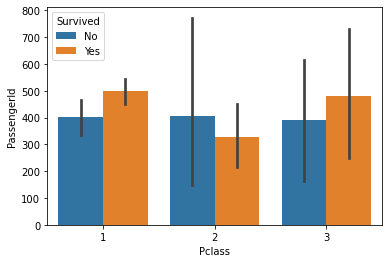

In [27]:
sns.barplot(data=data, x='Pclass', y='PassengerId', hue ='Survived')

Have a look at this function:

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

In [35]:
def plot_correlation_map( df ):

    corr = data.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
  

Try running the function, analyze what it does exactly and its utilities and finally, write a paragraph describing your analysis (the paragraph should be in English).

In [39]:
data.groupby(['Pclass', 'Survived']).mean()

PassengerId        Age
Pclass Survived                        
1      No         404.115385  42.971154
       Yes        498.179245  34.952075
2      No         405.000000  43.166667
       Yes        327.833333  20.791667
3      No         390.000000  23.400000
       Yes        482.400000  18.600000

In [69]:
data = pd.read_csv("titanic-passengers.csv") 
data.shape
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate.

In [54]:
data['Family_Size'] = '0'
data['Family_Size'] = data['Parch']+ data['SibSp']
 
data['Alone'] = '0'
data.loc[data.Family_Size == '0', 'Alone'] = '1'
sns.factorplot(x ='Family_Size', y ='Survived', data = data)
sns.factorplot(x ='Alone', y ='Survived', data = data)

TypeError: list indices must be integers or slices, not str

Finally, use the Parch and the SibSp columns to create a more useful feature, let's call it FamilySize.

In [75]:
all_data = [data]
for data in all_data:
    data['family_size'] = data['SibSp'] + data['Parch'] + 1
print( train_data[["family_size","Survived"]].groupby(["family_size"], as_index = False).mean() )


TypeError: list indices must be integers or slices, not str

Use what you have learned so far to conclude if this feature is useful or not.